# ML Study JAM 
### Plan du workshop 


1.   Introduction to machine learning and Deep learning 

    1.   What is Machine learning ? 
    2.   What is deep learning ? 
    3.   Give us some examples =) 
    4.   What tools will we use ? and why ? 
    
2.   Matrix Math and Numpy

3.   Prepare our data 

4.   Tackle a classification problem 
    1.       Linearity 
    2.       A small perceptron 
    3.       Gradient Descent 
    4.       Logistic Regression (Small talk)
    4.       FeedForward 
    5.       Backpropagation 
    
5.   Training a neural network 
    1.   Overfitting 
    2.   Underfitting 
    3.   Early stopping 
    4.   Regularization 
    
2.   Transfer learning 
    1.   Fine Tuning 
    2.   MobileNet Model 
    3.   Freezing weights ? 
    
2.   Tensorflow for poets 

7.    Cloud Engine SJ









# Matrix Math and Numpy

In [1]:
import numpy as np

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [6]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print (type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [9]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


**Initialize np Arrays**

Numpy also provides many functions to create arrays:

In [13]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

b = np.ones((1,2))   # Create an array of all ones
print(b)

c = np.full((2,2), 7) # Create a constant array
print(c)

d = np.eye(8)        # Create a 2x2 identity matrix
print(d)

e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[0.50807591 0.77070799]
 [0.47361609 0.56985236]]


**Array Indexing**

we can index an array using **Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [22]:
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

b = a[1:, 0:2]
print(b)

[[ 5  6]
 [ 9 10]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [23]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[1, 0]) 

2
77


Mixing integer indexing with slice indexing

In [24]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[77  6  7  8] (4,)
[[77  6  7  8]] (1, 4)
[[77  6  7  8]] (1, 4)


**Boolean Indexing**

In [29]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [26]:
print(a[bool_idx])

[3 4 5 6]


In [28]:
print(a[a>4])

[5 6]


**Matrix Operations**

In [30]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [31]:
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [32]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [0]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [0]:
# Elementwise division; both produce the array

print(x / y)
print(np.divide(x, y))

In [0]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

In [33]:
def f(x):
    return x**2
  
print(f(x))

[[ 1.  4.]
 [ 9. 16.]]


**Broadcasting**

In [34]:
print(a+10)
print(a*10)
print(a-10)
print(a/10)

[[11 12]
 [13 14]
 [15 16]]
[[10 20]
 [30 40]
 [50 60]]
[[-9 -8]
 [-7 -6]
 [-5 -4]]
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]


In [36]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

print(x+v)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


# **Other Matrix Operations:**

**Matrix / Vector Product**

In [37]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product
print(w.dot(v))
print(np.dot(v, w))

219
219


In [38]:
# Matrix / vector product
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product
print(x.dot(y))
print(np.dot(x, y))

[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


**Sum over Matrix elements**

In [41]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
 # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1)) 
a = np.sum(x, axis=0)
a = np.mean(x, axis=0)
a

10
[3 7]


array([2., 3.])

**Transpose**

In [42]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


**Reshaping**

In [48]:
a = np.full((2,4), 7)
print(a)
a = a.reshape((1,8))
print(a)

[[7 7 7 7]
 [7 7 7 7]]
[[7 7 7 7 7 7 7 7]]


# Prepare our Data 
Data preprocessing is an important not to say the most important step in a machine learning algorithm. It helps analyse the data, select the features and clean all the non relevant one. 

For this workshop will be using **MNIST dataset** ; a collection of different clothes. In the first part, will try to implement a fully connected neural network to detect which type of clothes it is. Then, will dive deeper into the world of deep learning and understand the convolutional neural network and the concept of transfer learning. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import time
import tensorflow as tf
import pandas as pd
tf.set_random_seed(1)
np.random.seed(1)

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
class_names[train_labels[1]]

'T-shirt/top'

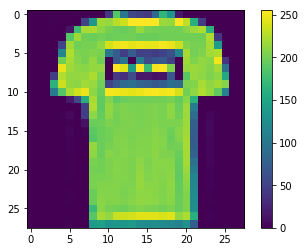

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

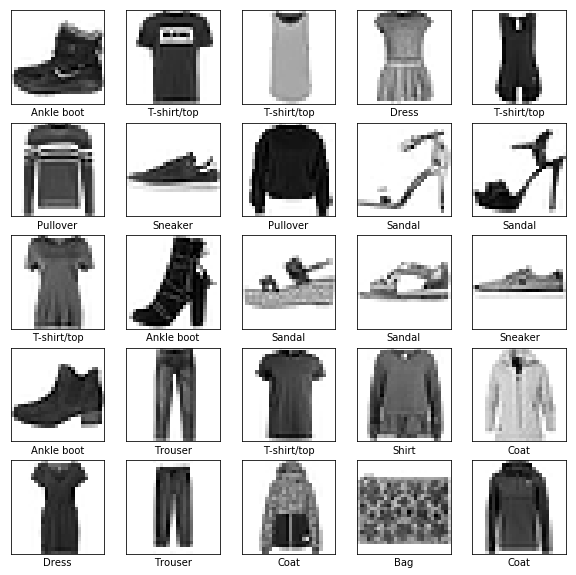

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# Normalize the data 
train_images = train_images / 255.0

test_images = test_images / 255.0

# **Tackling a classification problem**

In this section we'll talk more about the fundamental concepts behind neural networks and why is it so powerful. As we're explaining concept we'll try to implement them. 

### Linearity 
### How a small perceptron is built 
![](images/perceptron.png)

### Gradient Descent 
![](images/gradient.gif)

In [11]:
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = [] # To know that this value is decreasing 
    past_thetas = [theta] 
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y 
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


### Logistics Regression



**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

#### But How ? More complex linear models ? 
In the model represented by the following graph, we've added a "hidden layer" of intermediary values. Each yellow node in the hidden layer is a weighted sum of the blue input node values. The output is a weighted sum of the yellow nodes.
![](images/neural.jpg)

##### Activation functions 
###### Sigmoid 
![](images/sigmoid.jpg)
![](images/SigmoidFunction.png)
###### Relu 
![](images/relu.jpg)
![](images/relu2.jpg)
###### Tanh
![](images/1200px-Hyperbolic_Tangent.svg.png)


### Define our network 

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### What is Cross Entropy ? 
![](images/Cross.JPG) 
Source : https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

### Training our model 

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4918 - acc: 0.8284
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3739 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3361 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3113 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2949 - acc: 0.8913


#### FeedForward 
Feedforward is the process neural networks use to turn the input into an output.
![](images/feed.JPG)
#### Backpropagation 
Now, we're ready to get our hands into training a neural network. For this, we'll use the method known as backpropagation. In a nutshell, backpropagation will consist of:

1. Doing a feedforward operation.
2. Comparing the output of the model with the desired output.
3. Calculating the error.
4. Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
5. Use this to update the weights, and get a better model.
6. Continue this until we have a model that is good.

### Evaluate the model 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.8721


### Overfitting & Underfitting 
![](images/under.JPG) 

Source : https://www.udacity.com/course/deep-learning-pytorch--ud188


### Early stopping 
![](images/early.JPG)

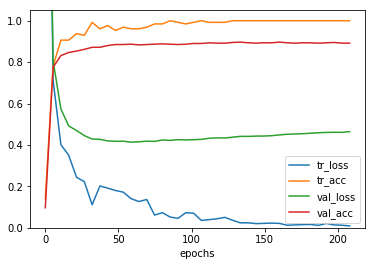

In [38]:
vals_df = pd.DataFrame(vals)
vals_df.columns = ['tr_loss', 'tr_acc', 'val_loss', 'val_acc']
vals_df['epochs'] = (np.asarray(range(len(vals_df))) * 100.0 * 128. / 2400)
vals_df.plot(ylim = (0,1.05), x='epochs')

### Regularization 
on the board :p 

## Make Predictions  


Coat


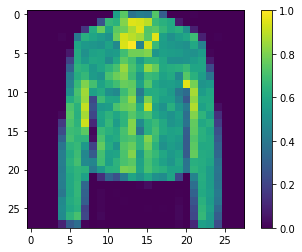

In [24]:
plt.figure()
plt.imshow(test_images[10])
print(class_names[test_labels[10]])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
predictions = model.predict(test_images)

In [22]:
class_names[np.argmax(predictions[10])]

'Coat'

### Transfer learning 
#### CNN 
There are four main operations in the ConvNet :

    1. Convolution
    2. Non Linearity (ReLU)
    3. Pooling or Sub Sampling
    4. Classification (Fully Connected Layer)
    
##### The Convolution Step 

![](images/convolution_schematic.gif) 

##### The pooling step 

** Architecture **
![](images/convnet.jpeg)
** Digits CNN **
![](images/conv_all.png)
** Pooling in CNNs **
![](images/pooling.gif)

